## Bellevue University
## DSC-540 Data Preparation
## Name: Tai Ngo
## Date: 4/5/2020

## Weeks 3 & 4 Exercises

### 1. Data Wrangling with Python: Activity 5, page 116

In [3]:
# load necessary libraries to run the program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# load the Boston Housing csv file into a dataframe with pandas
df=pd.read_csv("Boston_housing.csv")

In [6]:
# Check the first 10 rows
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:
# Check to see the number of rows and columns of the dataset
df.shape

(506, 15)

In [20]:
# Assign important columns into a dataframe
df1=df[['crim','zn','indus','rm','age','dis','rad','tax','ptratio','medv']]

In [21]:
# Check the 7 last rows of the dataset
df1.tail(7)

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,medv
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


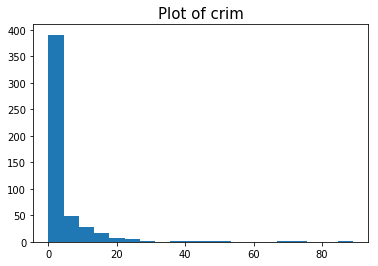

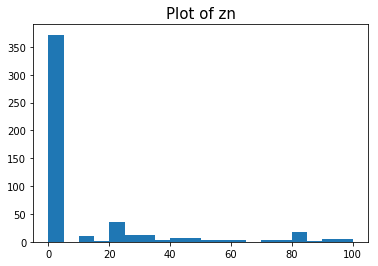

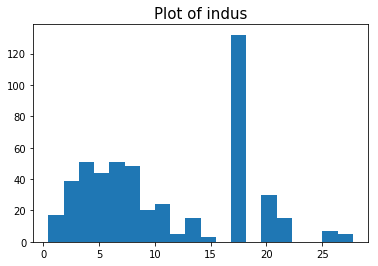

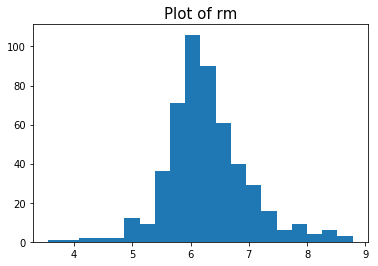

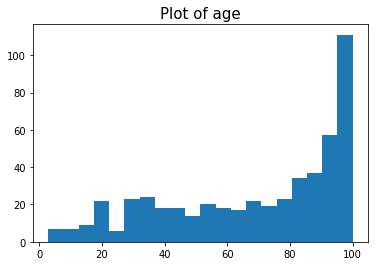

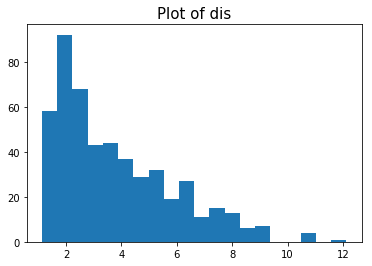

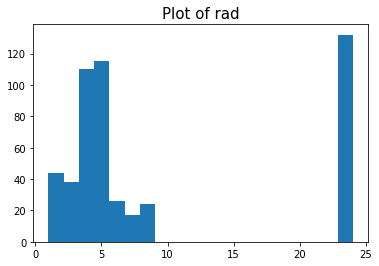

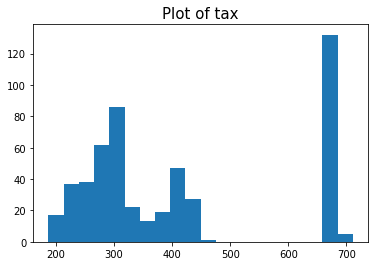

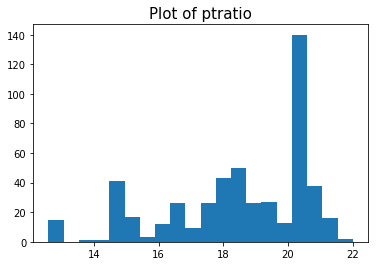

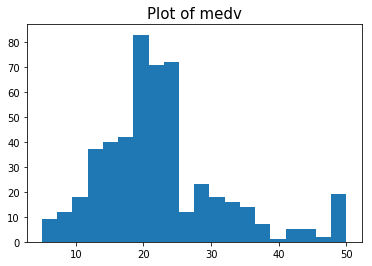

In [22]:
# Plot the histograms of each column
for c in df1.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(df1[c],bins=20)
    plt.show()

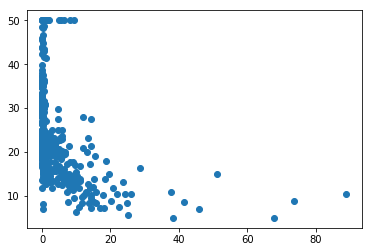

In [23]:
# Plot the scatter plot of crime rate versus the price
plt.scatter(df1['crim'],df1['medv'])
plt.show()

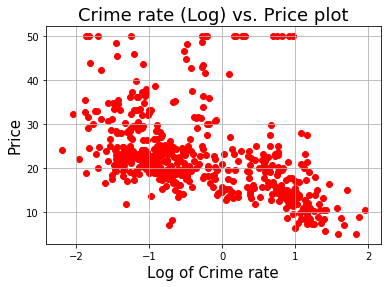

In [25]:
# plot the scatter plot of log of crime rate versus the price 
plt.scatter(np.log10(df1['crim']),df1['medv'],c='red')
plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
plt.xlabel("Log of Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid(True)
plt.show()

In [27]:
# calculate the root means
df1['rm'].mean()

6.284634387351788

In [28]:
# determine the median age
df1['age'].median()

77.5

In [30]:
# determine the mean distance between 5 Boston employment centres
df1['dis'].mean()

3.795042687747034

In [32]:
# Filter the price of the houses to be less than 20k
low_price=df1['medv']<20
# print the result
print(low_price)
# multiply the mean by 100 to obtain the percentage of houses with prices less than 20k
pcnt=low_price.mean()*100
print("\nPercentage of house with <20,000 price is: ",pcnt)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: medv, Length: 506, dtype: bool

Percentage of house with <20,000 price is:  41.50197628458498


In [33]:
# the result is 41.5% of houses that are less than 20k.

## 2. Data Wrangling with Python: Activity 6, page 171

In [68]:
# load the adult income data csv file into the dataframe using pandas
df = pd.read_csv("adult_income_data.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### The names of the columns do not make sense, we need to edit the names

In [69]:
names = []
with open('adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)

In [70]:
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [71]:
# change the name of the last column from <=50 to Income
names.append('Income')

In [72]:
# load the file into the dataframe again with the new names for each column
df = pd.read_csv("adult_income_data.csv",names=names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
# use the describe() to show the statistical summary of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [42]:
# Because some columns have many factors and classes, we need a loop to write and print them
# Make a list of all variables with classes
vars_class = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [43]:
for v in vars_class:
    classes=df[v].unique()
    num_classes = df[v].nunique()
    print("There are {} classes in the \"{}\" column. They are: {}".format(num_classes,v,classes))
    print("-"*100)

There are 9 classes in the "workclass" column. They are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
There are 16 classes in the "education" column. They are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
There are 7 classes in the "marital-status" column. They are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
There are 15 classes in the "occupation" column. They are: [' Adm-clerical' ' Exec

In [44]:
# check to see if there is any missing value in the columns
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [45]:
# make a new dataframe with only four variables: age, education, occupation and race
df_subset = df[['age','education','occupation','race']]
df_subset.head()

,age,education,occupation,race
0,39,Bachelors,Adm-clerical,White
1,50,Bachelors,Exec-managerial,White
2,38,HS-grad,Handlers-cleaners,White
3,53,11th,Handlers-cleaners,Black
4,28,Bachelors,Prof-specialty,Black


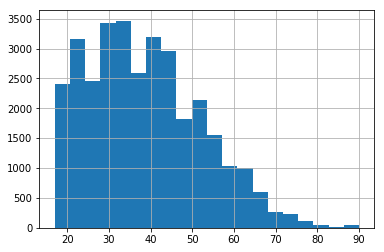

In [46]:
# draw the histogram of age with bin = 20 only
df_subset['age'].hist(bins=20)

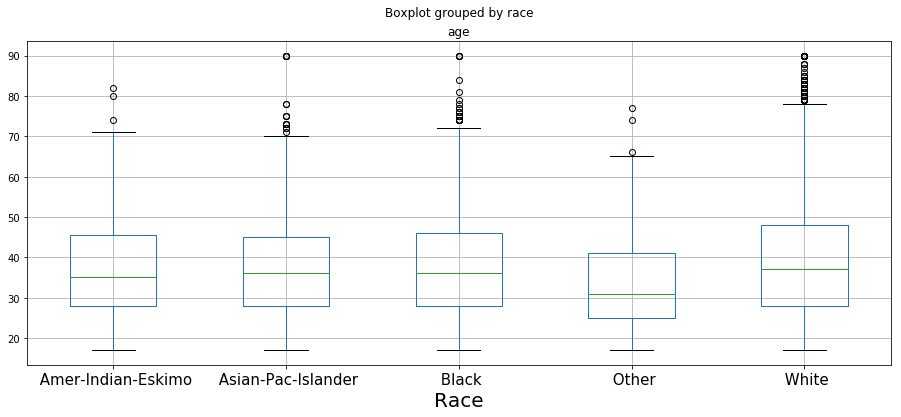

In [47]:
# draw the boxplot of age with different races
df_subset.boxplot(column='age',by='race',figsize=(15,6))
plt.xticks(fontsize=15)
plt.xlabel("Race",fontsize=20)
plt.show()

In [48]:
# write a function to strip the white space character
def strip_whitespace(s):
    return s.strip()

In [ ]:
# Education column
df_subset['education_stripped']=df['education'].apply(strip_whitespace)
df_subset['education']=df_subset['education_stripped']
df_subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
df_subset['occupation_stripped']=df['occupation'].apply(strip_whitespace)
df_subset['occupation']=df_subset['occupation_stripped']
df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

# Race column
df_subset['race_stripped']=df['race'].apply(strip_whitespace)
df_subset['race']=df_subset['race_stripped']
df_subset.drop(labels=['race_stripped'],axis=1,inplace=True)

In [50]:
# determine how many black people with the age between 30 and 50 in this dataset
df_filtered=df_subset[(df_subset['race']=='Black') & (df_subset['age']>=30) & (df_subset['age']<=50)]

In [51]:
df_filtered.head()

,age,education,occupation,race
6,49,9th,Other-service,Black
10,37,Some-college,Exec-managerial,Black
13,32,Assoc-acdm,Sales,Black
22,35,9th,Farming-fishing,Black
71,31,Bachelors,Sales,Black


In [52]:
# pick the first element from index 0
answer_1=df_filtered.shape[0]

In [53]:
print("There are {} black people of age between 30 and 50 in this dataset.".format(answer_1))

There are 1630 black people of age between 30 and 50 in this dataset.


In [73]:
# use the groupby() to see the mean ages
df_subset.groupby(['race','education']).mean()

age
race               education              
Amer-Indian-Eskimo 10th          37.250000
                   11th          31.642857
                   12th          25.400000
                   1st-4th       45.750000
                   5th-6th       39.000000
...                                    ...
White              HS-grad       39.270777
                   Masters       44.338972
                   Preschool     40.289474
                   Prof-school   44.996109
                   Some-college  35.980989

[79 rows x 1 columns]

In [55]:
# use groupby() for occupation and describe() for age to show the statistical summary
df_subset.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [56]:
# detect outlier
# again use groupby() for occupation and describe() for age
occupation_stats= df_subset.groupby('occupation').describe()['age']

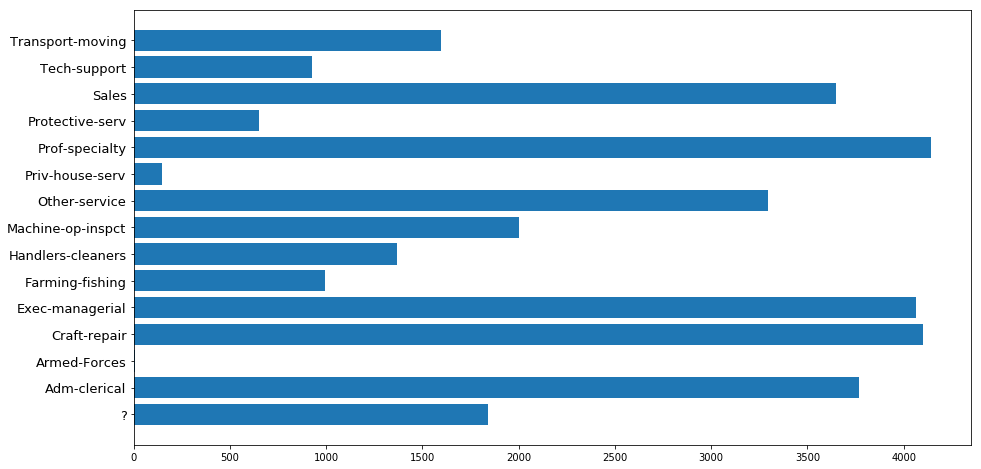

In [57]:
# draw the charts to visualize
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [58]:
# merging two datasets with a common key 'occupation'
df_1 = df[['age','workclass','occupation']].sample(5,random_state=101)

In [59]:
df_1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [60]:
df_2 = df[['education','race','occupation']].sample(5,random_state=101)

In [61]:
df_2.head()

,education,race,occupation
22357,HS-grad,White,Machine-op-inspct
26009,11th,White,Sales
20734,HS-grad,White,Exec-managerial
17695,10th,White,Handlers-cleaners
27908,7th-8th,White,Craft-repair


In [62]:
df_merged = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()

In [63]:
df_merged

,age,workclass,occupation,education,race
0,51,Private,Machine-op-inspct,HS-grad,White
1,19,Private,Sales,11th,White
2,40,Private,Exec-managerial,HS-grad,White
3,17,Private,Handlers-cleaners,10th,White
4,61,Private,Craft-repair,7th-8th,White


## 3. Create a series and practice basic arithmetic steps

In [79]:
series_1 = ['7.3','-2.5','3.4','1.5']
ser1 = pd.Series(series_1, index = ['a', 'c', 'd', 'e'])
print(ser1)

a     7.3
c    -2.5
d     3.4
e     1.5
dtype: object


In [80]:
series_2 = ['-2.1','3.6','-1.5','4','3.1']
ser2 = pd.Series(series_2, index = ['a', 'c', 'e', 'f','g'])
print(ser2)

a    -2.1
c     3.6
e    -1.5
f       4
g     3.1
dtype: object


In [81]:
# add two series
add = series_1 + series_2

In [82]:
# print result
print(add)

['7.3', '-2.5', '3.4', '1.5', '-2.1', '3.6', '-1.5', '4', '3.1']


In [84]:
subtract = series_2 - series_1

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
# because two series do not have the same index number, the subtraction shows error.